## How are in-demand skills trending for Data Analysts in Spain?

Methodology

        1. Aggregate skills counts monthly
        2. Re-analize based on percentage of total jobs
        3. Plot the monthly skill demand

In [59]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [60]:
df_DA_SPA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()

df_DA_SPA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1573,Data Analyst,Data Analyst,"Barcelona, Spain",via BeBee,Full-time,False,Spain,2023-12-13 13:48:15,True,False,Spain,None,NaN,NaN,Lodgify,None,None
2774,Data Analyst,Data Analyst,"Getafe, Spain",via BeBee,Full-time,False,Spain,2023-03-03 13:18:04,False,False,Spain,None,NaN,NaN,airbus,"[python, pyspark]","{'libraries': ['pyspark'], 'programming': ['py..."
2927,Data Analyst,Data Analyst,"Madrid, Spain",via Indeed,Full-time,False,Spain,2023-06-26 13:43:39,False,False,Spain,None,NaN,NaN,MAPAL Group,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
4128,Data Analyst,Data Analyst,"Madrid, Spain",via LinkedIn,Full-time,False,Spain,2023-03-10 13:25:36,False,False,Spain,None,NaN,NaN,Capitole Consulting,"[sql, bigquery, power bi, looker, excel, sheet...","{'analyst_tools': ['power bi', 'looker', 'exce..."
4192,Data Analyst,Data Analyst,"Gijón, Spain",via Trabajo.org,Full-time,False,Spain,2023-02-19 13:23:08,False,False,Spain,None,NaN,NaN,Buscojobs ES Premium,"[power bi, microstrategy]","{'analyst_tools': ['power bi', 'microstrategy']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782217,Data Analyst,Data Analyst,"San Fernando de Henares, Spain",via BeBee,Full-time,False,Spain,2023-10-09 06:48:10,False,False,Spain,None,NaN,NaN,Big Fish - Personas & Talento,"[tableau, power bi]","{'analyst_tools': ['tableau', 'power bi']}"
782291,Data Analyst,Data Analyst,"Barcelona, Spain",via BeBee,Full-time,False,Spain,2023-10-09 06:48:21,False,False,Spain,None,NaN,NaN,PepsiCo,[flow],{'other': ['flow']}
783850,Data Analyst,Data Analyst,"Getafe, Spain",via BeBee,Full-time,False,Spain,2023-10-06 06:33:31,False,False,Spain,None,NaN,NaN,Airbus,"[python, pyspark]","{'libraries': ['pyspark'], 'programming': ['py..."
783892,Data Analyst,Data Analyst,"Madrid, Spain",via Trabajo.org,Full-time,False,Spain,2023-01-10 06:25:51,False,False,Spain,None,NaN,NaN,Kordian Group sp zoo,"[sql, python, azure, aws, looker, jira]","{'analyst_tools': ['looker'], 'async': ['jira'..."


In [61]:
df_DA_SPA['job_posted_month_number'] = df_DA_SPA['job_posted_date'].dt.month

In [62]:
df_DA_SPA_explode = df_DA_SPA.explode('job_skills')

In [63]:
df_DA_SPA_pivot = df_DA_SPA_explode.pivot_table(index='job_posted_month_number', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_SPA_pivot.loc['Total'] = df_DA_SPA_pivot.sum()

df_DA_SPA_pivot = df_DA_SPA_pivot[df_DA_SPA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_SPA_pivot = df_DA_SPA_pivot.drop('Total')

df_DA_SPA_pivot


job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,78,50,37,43,35,21,26,13,9,9,...,0,0,0,0,1,0,0,0,0,0
2,57,49,36,36,25,23,14,13,5,7,...,0,0,0,0,0,1,0,0,0,0
3,54,34,36,20,18,14,10,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,69,40,24,22,26,25,14,10,8,6,...,0,1,0,0,0,0,0,0,1,0
5,58,37,23,25,29,18,16,2,6,4,...,0,0,0,0,0,0,0,0,0,0
6,65,34,37,27,17,12,8,6,4,9,...,0,0,0,0,0,0,0,0,0,0
7,65,48,19,28,25,16,16,6,5,5,...,0,0,1,1,0,0,0,0,0,0
8,90,64,41,41,38,28,18,12,14,11,...,1,0,0,0,0,0,0,0,0,0
9,69,42,29,30,31,17,20,10,21,11,...,0,0,0,0,0,0,0,1,0,0


In [64]:
DA_Totals = df_DA_SPA.groupby('job_posted_month_number').size()

In [65]:
df_DA_SPA_percent = df_DA_SPA_pivot.div(DA_Totals/100, axis=0)

df_DA_SPA_percent

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,63.934426,40.983607,30.327869,35.245902,28.688525,17.213115,21.311475,10.655738,7.377049,7.377049,...,0.000000,0.000000,0.000000,0.000000,0.819672,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.818182,44.545455,32.727273,32.727273,22.727273,20.909091,12.727273,11.818182,4.545455,6.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000
3,65.853659,41.463415,43.902439,24.390244,21.951220,17.073171,12.195122,6.097561,2.439024,2.439024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,70.408163,40.816327,24.489796,22.448980,26.530612,25.510204,14.285714,10.204082,8.163265,6.122449,...,0.000000,1.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020408,0.000000
5,66.666667,42.528736,26.436782,28.735632,33.333333,20.689655,18.390805,2.298851,6.896552,4.597701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,73.033708,38.202247,41.573034,30.337079,19.101124,13.483146,8.988764,6.741573,4.494382,10.112360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,75.581395,55.813953,22.093023,32.558140,29.069767,18.604651,18.604651,6.976744,5.813953,5.813953,...,0.000000,0.000000,1.162791,1.162791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,65.693431,46.715328,29.927007,29.927007,27.737226,20.437956,13.138686,8.759124,10.218978,8.029197,...,0.729927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,67.647059,41.176471,28.431373,29.411765,30.392157,16.666667,19.607843,9.803922,20.588235,10.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000


In [66]:
# changes month number to month name
df_DA_SPA_percent = df_DA_SPA_percent.reset_index()
df_DA_SPA_percent['job_posted_month'] = df_DA_SPA_percent['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_SPA_percent = df_DA_SPA_percent.set_index('job_posted_month')
df_DA_SPA_percent = df_DA_SPA_percent.drop(columns='job_posted_month_number')

df_DA_SPA_percent


job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,63.934426,40.983607,30.327869,35.245902,28.688525,17.213115,21.311475,10.655738,7.377049,7.377049,...,0.000000,0.000000,0.000000,0.000000,0.819672,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.818182,44.545455,32.727273,32.727273,22.727273,20.909091,12.727273,11.818182,4.545455,6.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000
Mar,65.853659,41.463415,43.902439,24.390244,21.951220,17.073171,12.195122,6.097561,2.439024,2.439024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,70.408163,40.816327,24.489796,22.448980,26.530612,25.510204,14.285714,10.204082,8.163265,6.122449,...,0.000000,1.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020408,0.000000
May,66.666667,42.528736,26.436782,28.735632,33.333333,20.689655,18.390805,2.298851,6.896552,4.597701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.033708,38.202247,41.573034,30.337079,19.101124,13.483146,8.988764,6.741573,4.494382,10.112360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,75.581395,55.813953,22.093023,32.558140,29.069767,18.604651,18.604651,6.976744,5.813953,5.813953,...,0.000000,0.000000,1.162791,1.162791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,65.693431,46.715328,29.927007,29.927007,27.737226,20.437956,13.138686,8.759124,10.218978,8.029197,...,0.729927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,67.647059,41.176471,28.431373,29.411765,30.392157,16.666667,19.607843,9.803922,20.588235,10.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000


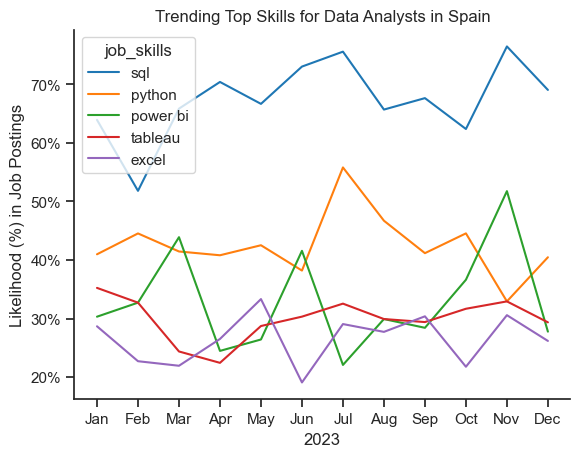

In [67]:
df_plot = df_DA_SPA_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Spain')
plt.ylabel('Likelihood (%) in Job Postings')
plt.xlabel('2023')
# plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

# for i in range(5):
   # plt.text(x=11.3, y=df_plot.iloc[-1, i], s=df_plot.columns[i])